<a href="https://colab.research.google.com/github/usharachamadugu/Data-Analysis-with-python/blob/master/startup_funding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#                    #**Top Funding Indian Startups** 



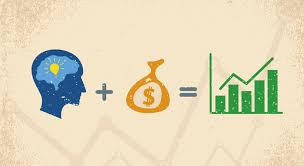

This notebook explores the analysis of indian startup funding and basically gives answer of following questions :-

1) How does the funding ecosystem change with time ?(Number of funding per month)

2) How much funds does startups generally get in India ?(maximum funding, minimum funding , average funding and number of fundings)

3) Which industries are favored by investors for funding ? (OR) Which type of companies got more easily funding ?

4) Do cities play a major role in funding ? (OR) Which city has maximum startups ?

5)Who is the important investors in the Indian Ecosystem?
What are different types of funding for startups ?

In [0]:
from google.colab import files
uploaded = files.upload()

In [0]:
import pandas as pd
import io
df2 = pd.read_csv(io.BytesIO(uploaded['startup_funding.csv']))

In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # Visualization
import seaborn as sns
color = sns.color_palette()


import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
%matplotlib inline
pd.options.mode.chained_assignment = None
#pd.options.display.max_columns = 999

In [0]:
df2.head()#returns top 5 rows

In [0]:
df2.columns# returns columns names

In [0]:
print("Size of data(Rows, Columns)",df2.shape)# returns no of rows and columns

In [0]:
# missing data 
total = df2.isnull().sum().sort_values(ascending = False)
percent = ((df2.isnull().sum()/df2.isnull().count())*100).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent %'])
missing_data.head()

In [0]:
del df2["Remarks"]
df2.head()

In [0]:
df2["AmountInUSD"] = df2["AmountInUSD"].apply(lambda x: float(str(x).replace(",","")))#Now convert the string "AmountInUSD" into numeric
df2["AmountInUSD"] = pd.to_numeric(df2["AmountInUSD"])
df2.head()


In [0]:
### Some more fixes in the data format. Will try to fix in the input file in next version #
df2['Date'][df2['Date']=='12/05.2015'] = '12/05/2015'
df2['Date'][df2['Date']=='13/04.2015'] = '13/04/2015'
df2['Date'][df2['Date']=='15/01.2015'] = '15/01/2015'
df2['Date'][df2['Date']=='22/01//2015'] = '22/01/2015'
df2["yearmonth"] = (pd.to_datetime(df2['Date'],format='%d/%m/%Y').dt.year*100)+(pd.to_datetime(df2['Date'],format='%d/%m/%Y').dt.month)
temp = df2['yearmonth'].value_counts().sort_values(ascending = False).head(10)
print("Number of funding per month in decreasing order(Top 10)\n",temp)
year_month = df2['yearmonth'].value_counts()
plt.figure(figsize=(15,8))
sns.barplot(year_month.index, year_month.values, alpha=0.9, color=color[0])
plt.xticks(rotation='vertical')
plt.xlabel('Year-Month of transaction', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Year-Month Distribution", fontsize=16)
plt.show()

Ques 2 : How much funds does startups generally get in India ?(maximum funding, minimum funding , average funding and number of fundings)

In [0]:
print("Maximum funding to a Startups is : ",df2["AmountInUSD"].dropna().sort_values().max())

In [0]:
df2[df2.AmountInUSD == 1400000000.0]

In [0]:
df2[df2.StartupName == 'Paytm']

As we can see Paytm and Flipkart got maximum funding of 1400000000 USD. Now lats see least funding.

In [0]:
print("Minimum funding to a Startups is : ",df2["AmountInUSD"].dropna().sort_values().min())

In [0]:
df2[df2.AmountInUSD == 16000.0]

Now as we can see Hostel Dunia, Play your sport, Yo Grad, Enabli and CBS are least funded Startups i.e, 16000 USD

In [0]:
print("On Average indian startups got funding of : ",df2["AmountInUSD"].dropna().sort_values().mean())

In [0]:
print("Total startups funded : ", len(df2["StartupName"].unique()))
print(df2["StartupName"].value_counts().head(10))
startupname = df2['StartupName'].value_counts().head(20)
plt.figure(figsize=(15,8))
sns.barplot(startupname.index, startupname.values, alpha=0.9, color=color[0])
plt.xticks(rotation='vertical')
plt.xlabel('Startup Name', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Number of funding a startup got", fontsize=16)
plt.show()

Ques 3 : Which industries are favored by investors for funding ? (OR) Which type of companies got more easily funding ?

In [0]:
industry = df2['IndustryVertical'].value_counts().head(10)
print(industry)
plt.figure(figsize=(15,8))
sns.barplot(industry.index, industry.values, alpha=0.9, color=color[0])
plt.xticks(rotation='vertical')
plt.xlabel('Industry vertical of startups', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Industry vertical of startups with number of funding", fontsize=16)
plt.show()

Ques 4 : Do cities play a major role in funding ? (OR) Which city has maximum startups ?

In [0]:
industry = df2['SubVertical'].value_counts().head(10)
print(industry)
plt.figure(figsize=(15,8))
sns.barplot(industry.index, industry.values, alpha=0.9, color=color[0])
plt.xticks(rotation='vertical')
plt.xlabel('Subvertical of startups', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Subvertical of startups with number of funding", fontsize=16)
plt.show()

In [0]:
city = df2['CityLocation'].value_counts().head(10)
print(city)
plt.figure(figsize=(15,8))
sns.barplot(city.index, city.values, alpha=0.9, color=color[0])
plt.xticks(rotation='vertical')
plt.xlabel('city location of startups', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("city location of startups with number of funding", fontsize=16)
plt.show()

Ques 5 : Who is the important investors in the Indian Ecosystem?

In [0]:
from wordcloud import WordCloud

names = df2["InvestorsName"][~pd.isnull(df2["InvestorsName"])]
#print(names)
wordcloud = WordCloud(max_font_size=50, width=600, height=300).generate(' '.join(names))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.title("Wordcloud for Investor Names", fontsize=35)
plt.axis("off")
plt.show()

In [0]:
investors = df2['InvestorsName'].value_counts().head(10)
print(investors)
plt.figure(figsize=(15,8))
sns.barplot(investors.index, investors.values, alpha=0.9, color=color[0])
plt.xticks(rotation='vertical')
plt.xlabel('Investors Names', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Investors Names with number of funding", fontsize=16)
plt.show()

Ques 6 : What are different types of funding for startups ?

In [0]:
investment = df2['InvestmentType'].value_counts()
print(investment)